In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/data-8/materials-su19/master/materials/su19/hw/hw02/old_faithful.csv')

In [ ]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [ ]:
import seaborn as sns

<Axes: xlabel='eruptions', ylabel='waiting'>

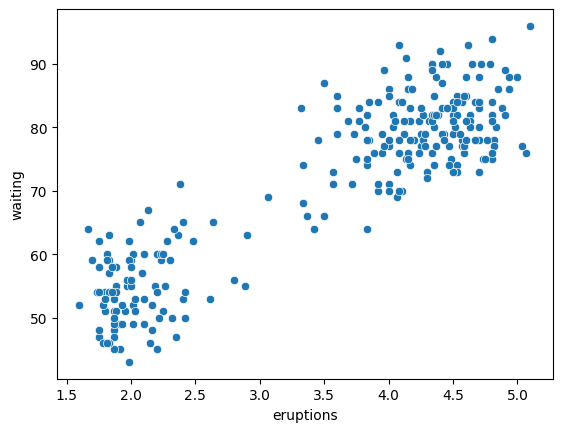

In [ ]:
sns.scatterplot(x=df['eruptions'], y=df['waiting'])

It seems like we can group data into 2 clusters i.e. k = 2. Let's verify it using elbow method.

In [ ]:
import numpy as np
K = np.arange(1, 7)

In [ ]:
from sklearn.cluster import KMeans
sse = []
for no_of_clusters in K:
    model = KMeans(n_clusters=no_of_clusters, random_state=0, n_init="auto")
    model.fit(df)
    sse.append(model.inertia_)

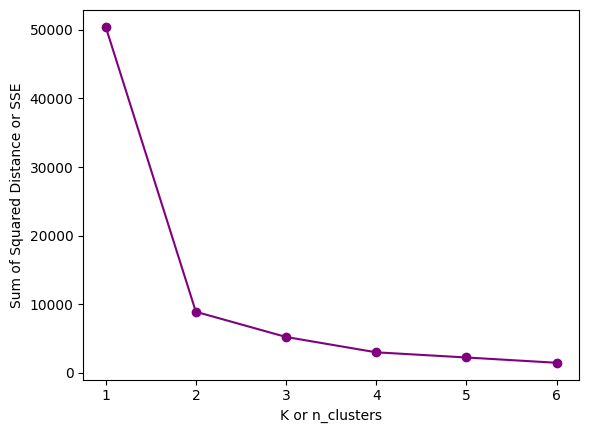

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, sse, 'o-', color='purple')
plt.xlabel("K or n_clusters")
plt.ylabel("Sum of Squared Distance or SSE")
plt.xticks(K)
plt.show()

The elbow is in 2 therefore, K = 2 is the right number of cluster.

In [ ]:
no_of_clusters = 2
model = KMeans(n_clusters=no_of_clusters, random_state=0, n_init="auto")
clusters = model.fit_predict(df)

In [ ]:
cluster_center = model.cluster_centers_ # centroid
cluster_center

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

<Axes: xlabel='eruptions', ylabel='waiting'>

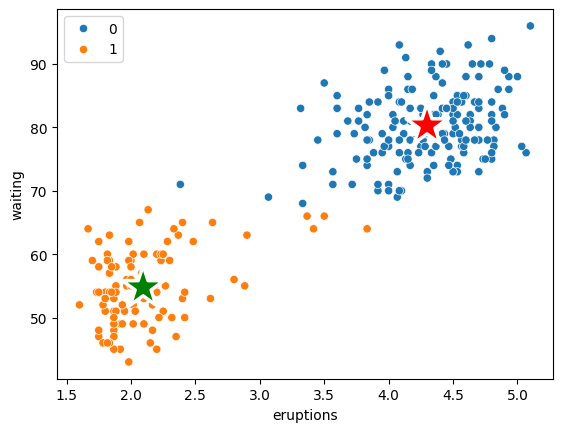

In [ ]:
sns.scatterplot(x=df['eruptions'], y=df['waiting'], hue=clusters)
sns.scatterplot(x=cluster_center[:, 0], y=cluster_center[:, 1], marker='*', s=1000, color = ['red', 'green'])

In [ ]:
model.predict([[4, 68]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)